# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:16<00:00, 1426.85it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
sent = project_data['project_title'].values[2000]
print(sent)

Steady Stools for Active Learning


In [19]:
# similarly you can preprocess the titles also
    
preprocessed_titles = []
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r',' ')
    sent = sent.replace('\\"',' ')
    sent = sent.replace('\\n',' ')
    sent = re.sub('[^A-Za-z0-9]+',' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34060.83it/s]


In [20]:
preprocessed_titles[2000]

'steady stools active learning'

In [21]:
# Replacing nan values from teacher prefix
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

clean_teacher_prefix = list(project_data['teacher_prefix'].fillna('no_prefix'))
#print(clean_teacher_prefix[501:1000])
project_data['clean_teacher_prefix'] = clean_teacher_prefix


## 1.5 Preparing data for models

In [22]:
#Merging price data from resource_data
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'clean_teacher_prefix', 'price', 'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [24]:
# Getting all preprocessed data to furthur split it into train, test and validation and then vectorizing it
clean_categories = project_data['clean_categories'].values
clean_subcategories = project_data['clean_subcategories'].values
clean_teacher_prefix = project_data['clean_teacher_prefix'].values
school_state = project_data['school_state'].values
project_grade_category = project_data['project_grade_category'].values
price = project_data['price'].values
teacher_number_of_previously_posted_projects = project_data['teacher_number_of_previously_posted_projects'].values


#https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

preprocessed_data = pd.DataFrame(list(zip(clean_categories, clean_subcategories, clean_teacher_prefix, school_state, 
                                          project_grade_category, price,teacher_number_of_previously_posted_projects, 
                                          preprocessed_essays, preprocessed_titles)), 
               columns =['clean_categories', 'clean_subcategories', 'clean_teacher_prefix', 'school_state',
                         'project_grade_category', 'price', 'teacher_number_of_previously_posted_projects', 
                         'preprocessed_essays', 'preprocessed_titles'])

In [25]:
preprocessed_data.head(3)

,clean_categories,clean_subcategories,clean_teacher_prefix,school_state,project_grade_category,price,teacher_number_of_previously_posted_projects,preprocessed_essays,preprocessed_titles
0,Literacy_Language,ESL Literacy,Mrs.,IN,Grades PreK-2,154.60,0,students english learners working english seco...,educational support english learners home
1,History_Civics Health_Sports,Civics_Government TeamSports,Mr.,FL,Grades 6-8,299.00,7,students arrive school eager learn polite gene...,wanted projector hungry learners
2,Health_Sports,Health_Wellness TeamSports,Ms.,AZ,Grades 6-8,516.85,1,true champions not always ones win guts mia ha...,soccer equipment awesome middle school students


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [26]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [27]:
X_main = preprocessed_data
Y_main = project_data.project_is_approved

print(f'Shape of X_main: {X_main.shape}')
print(f'Shape of Y_main: {Y_main.shape}')

Shape of X_main: (109248, 9)
Shape of Y_main: (109248,)


In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_main, Y_main, test_size=0.3,stratify=Y_main)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.3, stratify=y_train)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)
X_train.head(2)

(53531, 9)
(32775, 9)
(22942, 9)


,clean_categories,clean_subcategories,clean_teacher_prefix,school_state,project_grade_category,price,teacher_number_of_previously_posted_projects,preprocessed_essays,preprocessed_titles
89614,Literacy_Language,ESL Literature_Writing,Mrs.,NY,Grades 6-8,184.99,1,classroom multicultural students new united st...,bridging languages
59534,Literacy_Language Math_Science,Literacy Mathematics,Mrs.,NC,Grades PreK-2,110.96,2,students brightest inspirational children ever...,please help us prepare kindergarten


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 2.2.1 Vectorizing Categorical model

In [30]:
#Vectorizing clean categories
from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
train_categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)

test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of test matrix after one hot encodig ",test_categories_one_hot.shape)

cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print("Shape of cv matrix after one hot encodig ",cv_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (53531, 9)
Shape of test matrix after one hot encodig  (32775, 9)
Shape of cv matrix after one hot encodig  (22942, 9)


In [31]:
# Vectorizing clean sub categories
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
# we use count vectorizer to convert the values into one

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
train_subcat_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_subcat_one_hot.shape)

test_subcat_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of test matrix after one hot encodig ",test_subcat_one_hot.shape)

cv_subcat_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print("Shape of cv matrix after one hot encodig ",cv_subcat_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (53531, 30)
Shape of test matrix after one hot encodig  (32775, 30)
Shape of cv matrix after one hot encodig  (22942, 30)


In [32]:
# Count vectorier for state

states = set(X_train['school_state'].values)

vectorizer = CountVectorizer(vocabulary=list(states), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())


train_states_one_hot = vectorizer.transform(X_train['school_state'].values)
print("Shape of train matrix after one hot encodig ",train_states_one_hot.shape)

test_states_one_hot = vectorizer.transform(X_test['school_state'].values)
print("Shape of test matrix after one hot encodig ",test_states_one_hot.shape)

cv_states_one_hot = vectorizer.transform(X_cv['school_state'].values)
print("Shape of cv matrix after one hot encodig ",cv_states_one_hot.shape)

['MO', 'VT', 'OK', 'MD', 'HI', 'AL', 'AR', 'ID', 'NV', 'MI', 'IL', 'NE', 'NY', 'NC', 'GA', 'NJ', 'ME', 'PA', 'KY', 'WY', 'FL', 'IN', 'DE', 'CO', 'OR', 'SC', 'DC', 'MA', 'MN', 'KS', 'CT', 'WI', 'MT', 'TX', 'VA', 'AK', 'MS', 'UT', 'TN', 'AZ', 'WV', 'ND', 'NM', 'WA', 'LA', 'IA', 'SD', 'OH', 'RI', 'CA', 'NH']
Shape of train matrix after one hot encodig  (53531, 51)
Shape of test matrix after one hot encodig  (32775, 51)
Shape of cv matrix after one hot encodig  (22942, 51)


In [33]:
#Vectorizing clean_teacher_prefix

teacher_prefix = set(X_train['clean_teacher_prefix'].values)

vectorizer = CountVectorizer(vocabulary=list(teacher_prefix), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_teacher_prefix'].values)
print(vectorizer.get_feature_names())


train_teacher_prefix_one_hot = vectorizer.transform(X_train['clean_teacher_prefix'].values)
print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)

test_teacher_prefix_one_hot = vectorizer.transform(X_test['clean_teacher_prefix'].values)
print("Shape of test matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['clean_teacher_prefix'].values)
print("Shape of cv matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)

['Mrs.', 'Dr.', 'Teacher', 'Mr.', 'Ms.']
Shape of train matrix after one hot encodig  (53531, 5)
Shape of test matrix after one hot encodig  (32775, 5)
Shape of cv matrix after one hot encodig  (22942, 5)


In [34]:
#Vectorizing project_greade_categories

grade_categories = set(X_train['project_grade_category'].values)

vectorizer = CountVectorizer(vocabulary=list(grade_categories), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

train_grade_categories_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of train matrix after one hot encodig ",train_grade_categories_one_hot.shape)

test_grade_categories_one_hot = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of test matrix after one hot encodig ", test_grade_categories_one_hot.shape)

cv_grade_categories_one_hot = vectorizer.transform(X_cv['project_grade_category'].values)
print("Shape of cv matrix after one hot encodig ",cv_grade_categories_one_hot.shape)

['Grades 9-12', 'Grades PreK-2', 'Grades 3-5', 'Grades 6-8']
Shape of train matrix after one hot encodig  (53531, 4)
Shape of test matrix after one hot encodig  (32775, 4)
Shape of cv matrix after one hot encodig  (22942, 4)


### 2.2.2 Scaling Numerical features

In [35]:
#https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
from sklearn.preprocessing import Normalizer

#It was reshaped since it was raising error

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data


# Now standardize the data with above mean and variance.
train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(1, -1)).reshape(-1,1)
test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(1, -1)).reshape(-1,1)
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(1, -1)).reshape(-1,1)


print(train_price_standardized)

[[0.00173269]
 [0.0010393 ]
 [0.02199235]
 ...
 [0.00031827]
 [0.00164306]
 [0.00304633]]


In [36]:
# Standardizing teacher_number_of_previously_posted_projects
#from sklearn.preprocessing import MinMaxScaler
prev_posted_scalar = Normalizer()
prev_posted_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
train_prev_posted_standardized = prev_posted_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
test_prev_posted_standardized = prev_posted_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
cv_prev_posted_standardized = prev_posted_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)

print(train_prev_posted_standardized)

[[0.00014276]
 [0.00028552]
 [0.00099933]
 ...
 [0.00042828]
 [0.00014276]
 [0.0007138 ]]


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Getting data for SET1 BoW

In [37]:
#Vectorizing preprocessed essays, BOW with bi-grams with min_df=10 and max_features=5000
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)

train_text_bow = vectorizer.fit_transform(X_train['preprocessed_essays'])
print("Shape of train matrix after one hot encodig ",train_text_bow.shape)

test_text_bow = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of test matrix after one hot encodig ",test_text_bow.shape)

cv_text_bow = vectorizer.transform(X_cv['preprocessed_essays'])
print("Shape of cv matrix after one hot encodig ",cv_text_bow.shape)

Shape of train matrix after one hot encodig  (53531, 5000)
Shape of test matrix after one hot encodig  (32775, 5000)
Shape of cv matrix after one hot encodig  (22942, 5000)


In [38]:
# Vectorizing preprocessed titles

vectorizer = CountVectorizer(min_df=10)

train_title_bow = vectorizer.fit_transform(X_train['preprocessed_titles'])
print("Shape of train matrix after one hot encodig ",train_title_bow.shape)

test_title_bow = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of test matrix after one hot encodig ",test_title_bow.shape)

cv_title_bow = vectorizer.transform(X_cv['preprocessed_titles'])
print("Shape of cv matrix after one hot encodig ",cv_title_bow.shape)

Shape of train matrix after one hot encodig  (53531, 2108)
Shape of test matrix after one hot encodig  (32775, 2108)
Shape of cv matrix after one hot encodig  (22942, 2108)


In [39]:
from scipy.sparse import hstack

train_XS1 = hstack((train_text_bow, train_title_bow, train_categories_one_hot, train_subcat_one_hot, train_states_one_hot,
                    train_teacher_prefix_one_hot,train_grade_categories_one_hot, train_price_standardized,
                    train_prev_posted_standardized)).tocsr()

test_XS1 = hstack((test_text_bow, test_title_bow, test_categories_one_hot, test_subcat_one_hot, test_states_one_hot,
                    test_teacher_prefix_one_hot, test_grade_categories_one_hot, test_price_standardized,
                    test_prev_posted_standardized)).tocsr()

cv_XS1 = hstack((cv_text_bow, cv_title_bow, cv_categories_one_hot, cv_subcat_one_hot, cv_states_one_hot,
                    cv_teacher_prefix_one_hot, cv_grade_categories_one_hot, cv_price_standardized,
                    cv_prev_posted_standardized)).tocsr()




<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applyng SGD with Hinge Loss on BoW Set1 with penalty l2

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.77it/s]


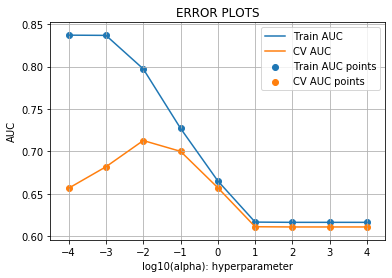

In [40]:
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV


train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l2', class_weight = 'balanced')
    SGD.fit(train_XS1, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS1, y_train)   

    y_train_pred = c_model.predict_proba(train_XS1)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS1)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4.1.b Applyng SGD with Hinge Loss on BoW Set1 with penalty l1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:05<00:00,  6.59s/it]


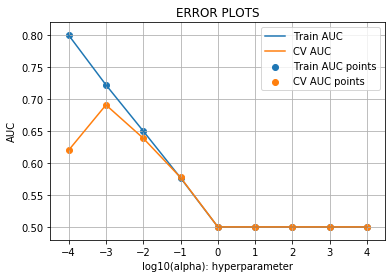

In [41]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l1', class_weight = 'balanced')
    SGD.fit(train_XS1, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS1, y_train)   

    y_train_pred = c_model.predict_proba(train_XS1)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS1)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4.2 taking best alpha and apply on test data

here from ablve results I am taking best alpha as 0.1 with penalty = 'l2'

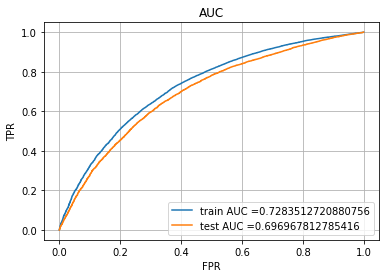

In [42]:
best_alpha = 10**-1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

SGD = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2', class_weight='balanced')
SGD.fit(train_XS1, y_train)
    

#https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
calibrator = CalibratedClassifierCV(SGD, cv='prefit')
c_model=calibrator.fit(train_XS1, y_train)

y_train_pred = c_model.predict_proba(train_XS1)[:, 1]    
y_test_pred = c_model.predict_proba(test_XS1)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [43]:
#Confusion matrix

# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
                predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.45125437652081785 for threshold 0.829


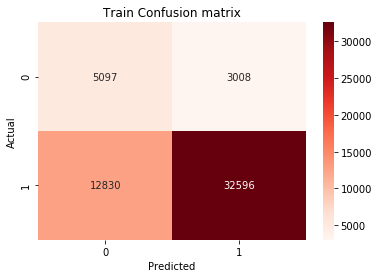

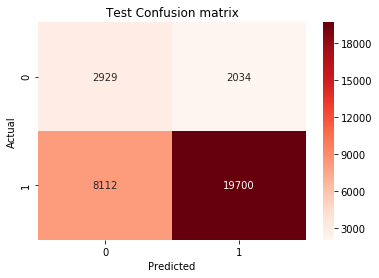

In [44]:

#https://www.kaggle.com/agungor2/various-confusion-matrix-plots
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sn

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#train cm
data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Train Confusion matrix')
plt.show()

#test_cm
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Test Confusion matrix')
plt.show()

## 2.3.2 Getting data for set2 TFIDF

In [45]:
# Vectorizing preprocessed essays using tfidf vetorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer_essay = TfidfVectorizer(min_df=10, ngram_range=(1,3), max_features=5000)

train_text_tfidf = tfvectorizer_essay.fit_transform(X_train['preprocessed_essays'])
print("Shape of train matrix after one hot encodig ",train_text_tfidf.shape)

test_text_tfidf = tfvectorizer_essay.transform(X_test['preprocessed_essays'])
print("Shape of test matrix after one hot encodig ",test_text_tfidf.shape)

cv_text_tfidf = tfvectorizer_essay.transform(X_cv['preprocessed_essays'])
print("Shape of cv matrix after one hot encodig ",cv_text_tfidf.shape)

Shape of train matrix after one hot encodig  (53531, 5000)
Shape of test matrix after one hot encodig  (32775, 5000)
Shape of cv matrix after one hot encodig  (22942, 5000)


In [46]:
# Vectorizing preprocessed titles using tfidf vectorizer

tfvectorizer_title = TfidfVectorizer(min_df=10)

train_title_tfidf = tfvectorizer_title.fit_transform(X_train['preprocessed_titles'])
print("Shape of train matrix after one hot encodig ",train_title_tfidf.shape)

test_title_tfidf = tfvectorizer_title.transform(X_test['preprocessed_titles'])
print("Shape of test matrix after one hot encodig ",test_title_tfidf.shape)

cv_title_tfidf = tfvectorizer_title.transform(X_cv['preprocessed_titles'])
print("Shape of cv matrix after one hot encodig ",cv_title_tfidf.shape)

Shape of train matrix after one hot encodig  (53531, 2108)
Shape of test matrix after one hot encodig  (32775, 2108)
Shape of cv matrix after one hot encodig  (22942, 2108)


In [47]:
from scipy.sparse import hstack

train_XS2 = hstack((train_text_tfidf, train_title_tfidf, train_categories_one_hot, train_subcat_one_hot, train_states_one_hot,
                    train_teacher_prefix_one_hot,train_grade_categories_one_hot, train_price_standardized,
                    train_prev_posted_standardized)).tocsr()

test_XS2 = hstack((test_text_tfidf, test_title_tfidf, test_categories_one_hot, test_subcat_one_hot, test_states_one_hot,
                    test_teacher_prefix_one_hot, test_grade_categories_one_hot, test_price_standardized,
                    test_prev_posted_standardized)).tocsr()

cv_XS2 = hstack((cv_text_tfidf, cv_title_tfidf, cv_categories_one_hot, cv_subcat_one_hot, cv_states_one_hot,
                    cv_teacher_prefix_one_hot, cv_grade_categories_one_hot, cv_price_standardized,
                    cv_prev_posted_standardized)).tocsr()



## 2.4.2 Applying SGD with Hinge loss on set2 with penalty l2

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.32it/s]


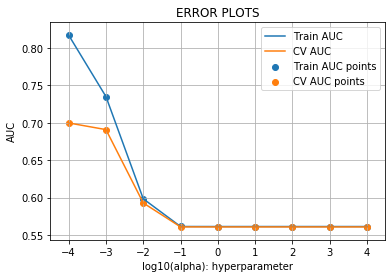

In [48]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l2', class_weight='balanced')
    SGD.fit(train_XS2, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS2, y_train)   

    y_train_pred = c_model.predict_proba(train_XS2)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS2)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 2.4.2b Applying SGD with hinge loss on Set2 with penalty l1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.71it/s]


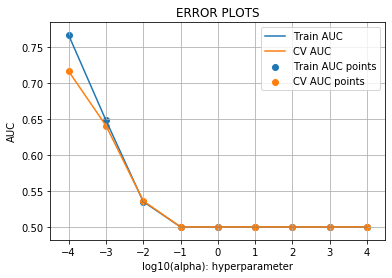

In [49]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l1', class_weight='balanced')
    SGD.fit(train_XS2, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS2, y_train)   

    y_train_pred = c_model.predict_proba(train_XS2)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS2)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Best alpha

TAking best alpha as 10**-3 and penalty l2

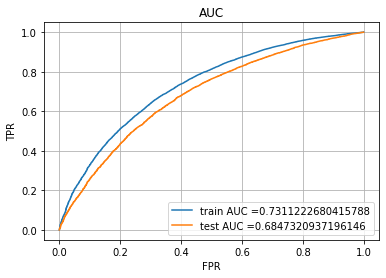

In [50]:
best_alpha = 10**-3
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

SGD = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2',class_weight='balanced')
SGD.fit(train_XS2, y_train)
    

#https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
calibrator = CalibratedClassifierCV(SGD, cv='prefit')
c_model=calibrator.fit(train_XS2, y_train)

y_train_pred = c_model.predict_proba(train_XS2)[:, 1]    
y_test_pred = c_model.predict_proba(test_XS2)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.45184508036376886 for threshold 0.845


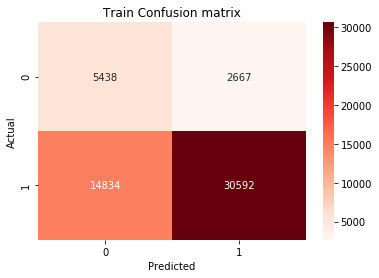

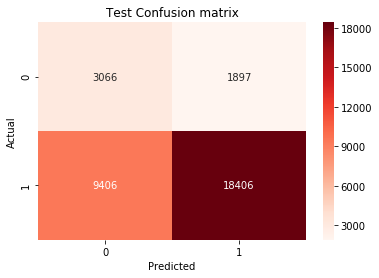

In [51]:

#https://www.kaggle.com/agungor2/various-confusion-matrix-plots
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sn

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#train cm
data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Train Confusion matrix')
plt.show()

#test_cm
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Test Confusion matrix')
plt.show()

## 2.3.3 Getting data for set3 avg w2v

In [52]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [53]:

# compute average word2vec for each review IN x_train
avg_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train.append(vector)

print(len(avg_w2v_essay_train))
print(len(avg_w2v_essay_train[0]))
#print(avg_w2v_essay_train[0])

100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:18<00:00, 2963.87it/s]


53531
300


In [54]:
avg_w2v_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:09<00:00, 2394.60it/s]


In [55]:
avg_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:12<00:00, 2605.79it/s]


### Avg w2v for preprocessed titles

In [56]:

# compute average word2vec for each review IN x_train
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))
#print(avg_w2v_title_train[0])

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 55499.13it/s]


53531
300


In [57]:
avg_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 51843.83it/s]


In [58]:
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 48398.47it/s]


In [59]:
# Concatenating all data for SET3

train_XS3 = hstack((avg_w2v_essay_train, avg_w2v_title_train, train_categories_one_hot, train_subcat_one_hot, train_states_one_hot,
                    train_teacher_prefix_one_hot,train_grade_categories_one_hot, train_price_standardized,
                    train_prev_posted_standardized)).tocsr()

test_XS3 = hstack((avg_w2v_essay_test, avg_w2v_title_test, test_categories_one_hot, test_subcat_one_hot, test_states_one_hot,
                    test_teacher_prefix_one_hot, test_grade_categories_one_hot, test_price_standardized,
                    test_prev_posted_standardized)).tocsr()

cv_XS3 = hstack((avg_w2v_essay_cv, avg_w2v_title_cv, cv_categories_one_hot, cv_subcat_one_hot, cv_states_one_hot,
                    cv_teacher_prefix_one_hot, cv_grade_categories_one_hot, cv_price_standardized,
                    cv_prev_posted_standardized)).tocsr()



## 2.4.3 Applying SGD with Hinge loss on Set3 with penalty l2

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:17<00:00,  1.47s/it]


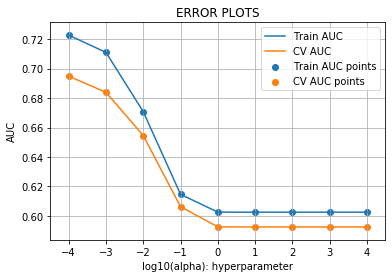

In [60]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l2',class_weight='balanced')
    SGD.fit(train_XS3, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS3, y_train)   

    y_train_pred = c_model.predict_proba(train_XS3)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS3)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 2.4.3b Applying SGD with Hinge loss on SET3 with penalty l1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:48<00:00,  3.79s/it]


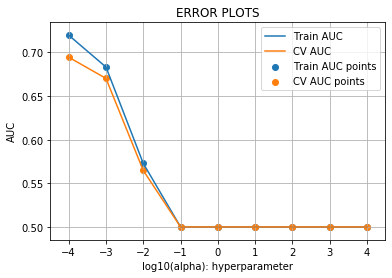

In [61]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l1',class_weight='balanced')
    SGD.fit(train_XS3, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS3, y_train)   

    y_train_pred = c_model.predict_proba(train_XS3)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS3)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Best alpha 


Taking alpha = 10**-3 wuth penalty l1

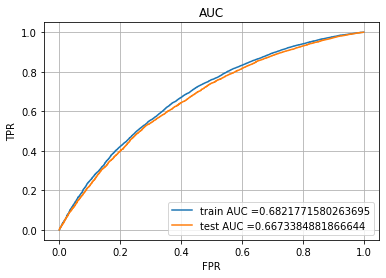

In [62]:
best_alpha = 10**-3
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

SGD = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l1',class_weight='balanced')
SGD.fit(train_XS3, y_train)
    

#https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
calibrator = CalibratedClassifierCV(SGD, cv='prefit')
c_model=calibrator.fit(train_XS3, y_train)

y_train_pred = c_model.predict_proba(train_XS3)[:, 1]    
y_test_pred = c_model.predict_proba(test_XS3)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.404048889649029 for threshold 0.845


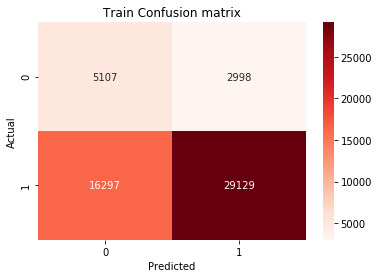

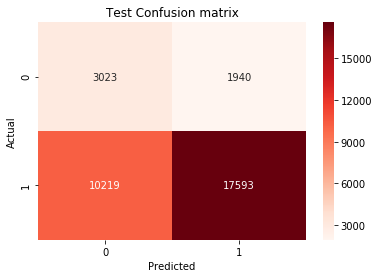

In [63]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#train cm
data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Train Confusion matrix')
plt.show()

#test_cm
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Test Confusion matrix')
plt.show()

## 2.3.4 Getting Data for set4 TFIDF W2V

In [64]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [65]:

# compute average word2vec for each review in X_train.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 53531/53531 [01:58<00:00, 453.36it/s]


53531
300


In [66]:
# compute average word2vec for each review in X_train.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [01:09<00:00, 468.42it/s]


32775
300


In [67]:
# compute average word2vec for each review in X_train.
tfidf_w2v_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_cv.append(vector)

print(len(tfidf_w2v_essay_cv))
print(len(tfidf_w2v_essay_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [00:49<00:00, 463.65it/s]


22942
300


In [68]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [69]:
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:01<00:00, 28279.30it/s]


53531
300


In [70]:
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:01<00:00, 25554.20it/s]


32775
300


In [71]:
tfidf_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 27581.94it/s]


22942
300


In [72]:
#Concatenating all data for set4
train_XS4 = hstack((tfidf_w2v_essay_train, tfidf_w2v_title_train, train_categories_one_hot, train_subcat_one_hot, train_states_one_hot,
                    train_teacher_prefix_one_hot,train_grade_categories_one_hot, train_price_standardized,
                    train_prev_posted_standardized)).tocsr()

test_XS4 = hstack((tfidf_w2v_essay_test, tfidf_w2v_title_test, test_categories_one_hot, test_subcat_one_hot, test_states_one_hot,
                    test_teacher_prefix_one_hot, test_grade_categories_one_hot, test_price_standardized,
                    test_prev_posted_standardized)).tocsr()

cv_XS4 = hstack((tfidf_w2v_essay_cv, tfidf_w2v_title_cv, cv_categories_one_hot, cv_subcat_one_hot, cv_states_one_hot,
                    cv_teacher_prefix_one_hot, cv_grade_categories_one_hot, cv_price_standardized,
                    cv_prev_posted_standardized)).tocsr()

## 2.4.4 Applying SGD with HInge Loss on SET4 with penalty l2

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  1.57s/it]


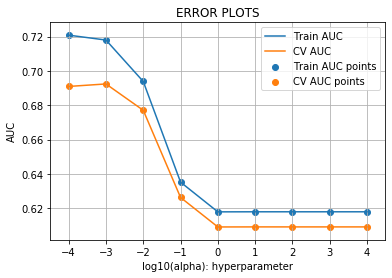

In [73]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l2',class_weight='balanced')
    SGD.fit(train_XS4, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS4, y_train)   

    y_train_pred = c_model.predict_proba(train_XS4)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS4)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 2.4.4b Applying SGD with Hinge loss on SET4 with penalty l1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:43<00:00,  3.43s/it]


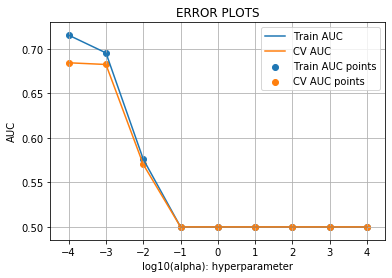

In [74]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l1',class_weight='balanced')
    SGD.fit(train_XS4, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS4, y_train)   

    y_train_pred = c_model.predict_proba(train_XS4)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS4)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Best Alpha

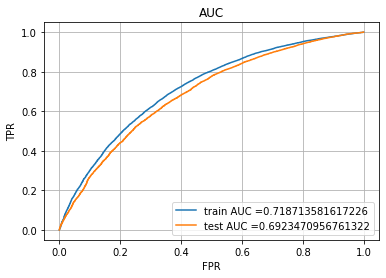

In [75]:
best_alpha = 10**-3
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

SGD = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2',class_weight='balanced')
SGD.fit(train_XS4, y_train)
    

#https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
calibrator = CalibratedClassifierCV(SGD, cv='prefit')
c_model=calibrator.fit(train_XS4, y_train)

y_train_pred = c_model.predict_proba(train_XS4)[:, 1]    
y_test_pred = c_model.predict_proba(test_XS4)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4411498653109736 for threshold 0.834


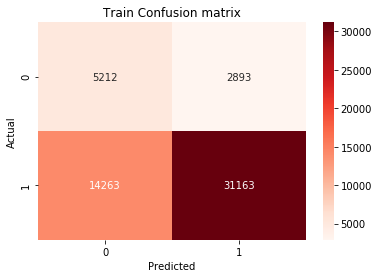

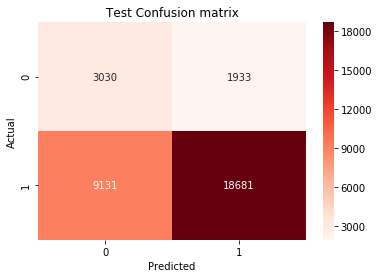

In [76]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#train cm
data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Train Confusion matrix')
plt.show()

#test_cm
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Test Confusion matrix')
plt.show()

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

## 2.3.5  Getting Data for Set5

In [77]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

#nltk.download('vader_lexicon')


# for train data
neg_train=[]
neu_train=[]
pos_train=[]
compound_train=[]
for i in tqdm(X_train['preprocessed_essays']):
    ss = sid.polarity_scores(i)
    neg_train.append(ss['neg'])
    neu_train.append(ss['neu'])
    pos_train.append(ss['pos'])
    compound_train.append(ss['compound'])
    
    
#No of words in title
count_title_train = []

for i in tqdm(X_train['preprocessed_titles']):
    count_title_train.append(len(list(i.split())))

    
#No of words in essay
count_essay_train = []
for i in tqdm(X_train['preprocessed_essays']):
    count_essay_train.append(len(list(i.split())))

C:\Users\chipl\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 82830.95it/s]


In [78]:
# for cv data
neg_cv=[]
neu_cv=[]
pos_cv=[]
compound_cv=[]
for i in tqdm(X_cv['preprocessed_essays']):
    ss = sid.polarity_scores(i)
    neg_cv.append(ss['neg'])
    neu_cv.append(ss['neu'])
    pos_cv.append(ss['pos'])
    compound_cv.append(ss['compound'])
    
    
#No of words in title
count_title_cv = []

for i in tqdm(X_cv['preprocessed_titles']):
    count_title_cv.append(len(list(i.split())))

    
#No of words in essay
count_essay_cv = []
for i in tqdm(X_cv['preprocessed_essays']):
    count_essay_cv.append(len(list(i.split())))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 79045.24it/s]


In [79]:
# for test data
neg_test=[]
neu_test=[]
pos_test=[]
compound_test=[]
for i in tqdm(X_test['preprocessed_essays']):
    ss = sid.polarity_scores(i)
    neg_test.append(ss['neg'])
    neu_test.append(ss['neu'])
    pos_test.append(ss['pos'])
    compound_test.append(ss['compound'])
    
    
#No of words in title
count_title_test = []

for i in tqdm(X_test['preprocessed_titles']):
    count_title_test.append(len(list(i.split())))

    
#No of words in essay
count_essay_test = []
for i in tqdm(X_test['preprocessed_essays']):
    count_essay_test.append(len(list(i.split())))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 77306.65it/s]


In [80]:
# Here I am taking max_features as 3000 features because I tried with 10000 and 5000 but my sytem is getting crashed. Hence reducing the features

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features = 3000)

train_text_tfidf = vectorizer.fit_transform(X_train['preprocessed_essays'])
print("Shape of train matrix after one hot encodig ",train_text_tfidf.shape)

test_text_tfidf = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of test matrix after one hot encodig ",test_text_tfidf.shape)

cv_text_tfidf = vectorizer.transform(X_cv['preprocessed_essays'])
print("Shape of cv matrix after one hot encodig ",cv_text_tfidf.shape)

Shape of train matrix after one hot encodig  (53531, 3000)
Shape of test matrix after one hot encodig  (32775, 3000)
Shape of cv matrix after one hot encodig  (22942, 3000)


In [81]:
train_text_tfidf.shape[1]

3000

In [82]:
#https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

from sklearn.decomposition import TruncatedSVD

component_no = train_text_tfidf.shape[1]-1

tsvd = TruncatedSVD(n_components=component_no)

tsvd_train = tsvd.fit(train_text_tfidf)

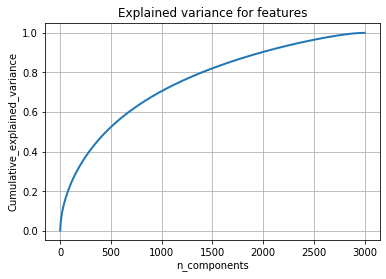

In [83]:
cum_var_explained = []

percentage_var_explained = tsvd_train.explained_variance_ / np.sum(tsvd_train.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)


plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('Explained variance for features')
plt.show()


### Observation

From above graph we can see that almost 90% variance is preserved for 2000 dimensions hence I am taking 2000 dimensions for furthur processing

In [84]:
tsvd = TruncatedSVD(n_components= 2000)

tsvd_train = tsvd.fit_transform(train_text_tfidf)

tsvd_cv = tsvd.transform(cv_text_tfidf)

tsvd_test = tsvd.transform(test_text_tfidf)

In [85]:
print(tsvd_train.shape)

(53531, 2000)


In [86]:
train_XS5 = hstack((train_categories_one_hot, train_subcat_one_hot, train_states_one_hot,
                    train_teacher_prefix_one_hot,train_grade_categories_one_hot, train_price_standardized,
                    train_prev_posted_standardized, np.array(neg_train).reshape(-1,1), np.array(neu_train).reshape(-1,1),
                    np.array(pos_train).reshape(-1,1),
                    np.array(compound_train).reshape(-1,1), 
                    np.array(count_title_train).reshape(-1,1), np.array(count_essay_train).reshape(-1,1), tsvd_train)).tocsr()

test_XS5 = hstack((test_categories_one_hot, test_subcat_one_hot, test_states_one_hot,
                    test_teacher_prefix_one_hot, test_grade_categories_one_hot, test_price_standardized,
                    test_prev_posted_standardized,
                    np.array(neg_test).reshape(-1,1), np.array(neu_test).reshape(-1,1),
                    np.array(pos_test).reshape(-1,1), np.array(compound_test).reshape(-1,1), 
                    np.array(count_title_test).reshape(-1,1), np.array(count_essay_test).reshape(-1,1), tsvd_test)).tocsr()

cv_XS5 = hstack((cv_categories_one_hot, cv_subcat_one_hot, cv_states_one_hot,
                    cv_teacher_prefix_one_hot, cv_grade_categories_one_hot, cv_price_standardized,
                    cv_prev_posted_standardized,
                    np.array(neg_cv).reshape(-1,1), np.array(neu_cv).reshape(-1,1),
                    np.array(pos_cv).reshape(-1,1),np.array(compound_cv).reshape(-1,1), 
                    np.array(count_title_cv).reshape(-1,1), np.array(count_essay_cv).reshape(-1,1), tsvd_cv)).tocsr()



## 2.4.5 Applying SGD with hing loss on Set5 with penalty l2

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:01<00:00, 10.95s/it]


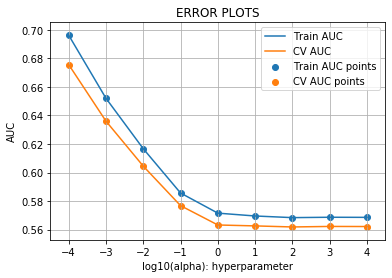

In [87]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l2',class_weight='balanced')
    SGD.fit(train_XS5, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS5, y_train)   

    y_train_pred = c_model.predict_proba(train_XS5)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS5)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 2.4.5b Applying SGD with Hinge loss on Set5 with penalty l1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [09:30<00:00, 31.31s/it]


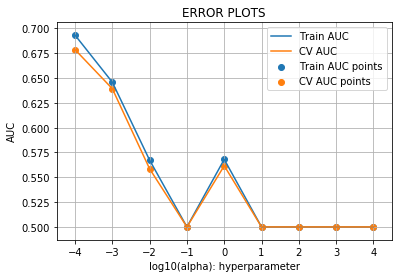

In [92]:
train_auc = []
cv_auc = []
a = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]

for i in tqdm(a):
    SGD = SGDClassifier(alpha=i, loss='hinge', penalty='l1',class_weight='balanced', max_iter = 2500)
    SGD.fit(train_XS5, y_train)
    
    #https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
    #https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
    calibrator = CalibratedClassifierCV(SGD, cv='prefit')
    c_model=calibrator.fit(train_XS5, y_train)   

    y_train_pred = c_model.predict_proba(train_XS5)[:,1]    
    y_cv_pred = c_model.predict_proba(cv_XS5)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(list(math.log10(i) for i in a), train_auc, label='Train AUC')
plt.plot(list(math.log10(i) for i in a), cv_auc, label='CV AUC')

plt.scatter(list(math.log10(i) for i in a) , train_auc, label='Train AUC points')
plt.scatter(list(math.log10(i) for i in a), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Best alpha

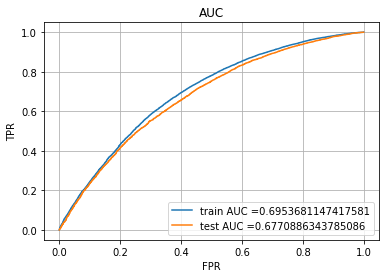

In [99]:
best_alpha = 10**-4
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

SGD = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2',class_weight='balanced')
SGD.fit(train_XS5, y_train)
    

#https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge
#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
    
calibrator = CalibratedClassifierCV(SGD, cv='prefit')
c_model=calibrator.fit(train_XS5, y_train)

y_train_pred = c_model.predict_proba(train_XS5)[:, 1]    
y_test_pred = c_model.predict_proba(test_XS5)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.41864027734648696 for threshold 0.835


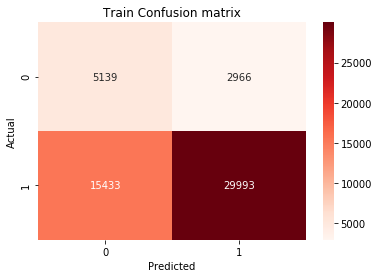

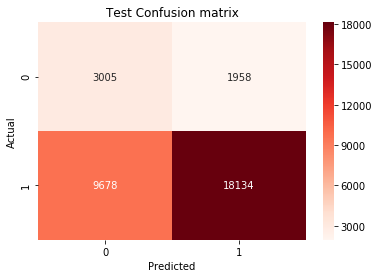

In [100]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
#train cm
data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Train Confusion matrix')
plt.show()

#test_cm
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)#for label size

#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sn.heatmap(df_cm, cmap="Reds", annot=True,fmt='d').set_title('Test Confusion matrix')
plt.show()

<h1>3. Conclusion</h1>

In [101]:
# Please compare all your models using Prettytable library

In [102]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = ['Vectorizer','Model', 'Penalty','Hyperparameter', 'AUC']

x.add_row(['BoW', 'SGD with hinge loss', 'l2', 0.1, 0.69])
x.add_row(['TFIDF', 'SGD with hinge loss', 'l2', 0.001, 0.68])
x.add_row(['Avg W2V','SGD with hinge loss', 'l1', 0.001, 0.66])
x.add_row(['TFIDF W2V', 'SGD with hinge loss','l2', 0.001, 0.69])
x.add_row(['With reduced dimensionaloty', 'SGD with hinge loss','l2', 0.0001,0.67])

print(x)

+-----------------------------+---------------------+---------+----------------+------+
|          Vectorizer         |        Model        | Penalty | Hyperparameter | AUC  |
+-----------------------------+---------------------+---------+----------------+------+
|             BoW             | SGD with hinge loss |    l2   |      0.1       | 0.69 |
|            TFIDF            | SGD with hinge loss |    l2   |     0.001      | 0.68 |
|           Avg W2V           | SGD with hinge loss |    l1   |     0.001      | 0.66 |
|          TFIDF W2V          | SGD with hinge loss |    l2   |     0.001      | 0.69 |
| With reduced dimensionaloty | SGD with hinge loss |    l2   |     0.0001     | 0.67 |
+-----------------------------+---------------------+---------+----------------+------+


In [7]:
import numpy as np

In [13]:
C = np.array([[1,2],
             [3,4]])

In [22]:
C/(C.sum(axis=1))

array([[0.33333333, 0.28571429],
       [1.        , 0.57142857]])

In [23]:
(C.T/(C.sum(axis=1)).T)

array([[0.33333333, 0.42857143],
       [0.66666667, 0.57142857]])

In [18]:
4/7

0.5714285714285714